<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_KNN_Tuning_assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import DataSet
import pandas as pd
from matplotlib import pyplot as plt
# create 2 data frame. 1 for regression and another for classification
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
df_regression = df.copy()
df_classification = df.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Regression

In [2]:
# before doing regression separate X (gender, height) and Y (weight)
col_x_regr = df_regression[['Gender', 'Height']].copy()
col_y_regr = df_regression[['Weight']].copy()
# col_y_regr.head()
col_x_regr.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


# label Encoding

In [3]:
# apply label encoding on X
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype

le = LabelEncoder()
all_columns = col_x_regr.columns
for column in all_columns:
  if is_string_dtype(col_x_regr[column]):
    # col_x_regr[column] = le.fit_transform(col_x_regr[column])
    col_x_regr.loc[:, column] = le.fit_transform(col_x_regr[column])

col_x_regr.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Train and Test Dataset for Linear Regression

In [4]:
# create train dataset and test dataset (70% / 30%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(col_x_regr, col_y_regr, test_size=0.30)

# Linear Regression, MSE, MAE

In [5]:
# apply linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(xtrain, ytrain)
# l_reg.predict([[1, 73.847017]])
test_predictions = l_reg.predict(xtest)

In [6]:
# get MSE, MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
l_reg_mse = mean_squared_error(ytest, test_predictions)
l_reg_mse

102.13846840020366

In [7]:
l_reg_mae = mean_absolute_error(ytest, test_predictions)
l_reg_mae

8.037966043883031

# KNN Regression, MSE, MAE

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)
score_kn = kn_reg.score(xtest, ytest)
print(f"Score: {score_kn}")
# Weight function used in prediction = distance
kn_distance_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_distance_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_distance_test_predictions = kn_distance_reg.predict(xtest)



Score: 0.8805404665174363


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

123.3079578734353

In [10]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

8.795614192375535

In [11]:
kn_reg_distance_mse = mean_squared_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mse

140.91729325451433

In [12]:
kn_reg_distance_mae = mean_absolute_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mae

9.40915215817703

# Tuning (RandomizedSearchCV)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
k_range = range(1, 30)
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(kn_reg, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(xtrain, ytrain)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Best Params: {'weights': 'distance', 'n_neighbors': 16}
CV Score: {'mean_fit_time': array([0.00878122, 0.00839648, 0.00902905, 0.00930116, 0.00906811,
       0.00957623, 0.00910962, 0.00888817, 0.01001654, 0.00743036]), 'std_fit_time': array([0.00063196, 0.00027977, 0.00117684, 0.00207934, 0.00102009,
       0.00147155, 0.00031106, 0.00030316, 0.00157238, 0.00199384]), 'mean_score_time': array([0.00957453, 0.01035752, 0.00952103, 0.01172194, 0.01099992,
       0.00955822, 0.01160674, 0.0094384 , 0.01240649, 0.00771623]), 'std_score_time': array([0.00120407, 0.00320657, 0.00105574, 0.0038232 , 0.00119515,
       0.00122034, 0.00189336, 0.00102152, 0.00315182, 0.00180242]), 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'distance',
                   'uniform', 'distance', 'distance', 'uniform',
                   'distance', 'uniform'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

In [39]:
# scores
print(f"Best Params: {rand.best_params_}")
print(f"CV Score: {rand.cv_results_}")

Best Params: {'weights': 'distance', 'n_neighbors': 16}
CV Score: {'mean_fit_time': array([0.00878122, 0.00839648, 0.00902905, 0.00930116, 0.00906811,
       0.00957623, 0.00910962, 0.00888817, 0.01001654, 0.00743036]), 'std_fit_time': array([0.00063196, 0.00027977, 0.00117684, 0.00207934, 0.00102009,
       0.00147155, 0.00031106, 0.00030316, 0.00157238, 0.00199384]), 'mean_score_time': array([0.00957453, 0.01035752, 0.00952103, 0.01172194, 0.01099992,
       0.00955822, 0.01160674, 0.0094384 , 0.01240649, 0.00771623]), 'std_score_time': array([0.00120407, 0.00320657, 0.00105574, 0.0038232 , 0.00119515,
       0.00122034, 0.00189336, 0.00102152, 0.00315182, 0.00180242]), 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'distance',
                   'uniform', 'distance', 'distance', 'uniform',
                   'distance', 'uniform'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?

In [40]:
rscv = rand.best_estimator_
rscv

KNeighborsRegressor(n_neighbors=16, weights='distance')

In [41]:
rscv.fit(xtrain, ytrain)
rscv.score(xtest, ytest)

0.8778506120637656

# Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

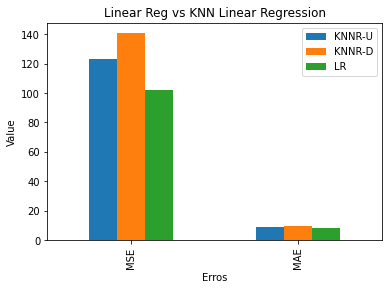

In [13]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR-U":[kn_reg_mse, kn_reg_mae],
    "KNNR-D":[kn_reg_distance_mse, kn_reg_distance_mae],
    "LR":[l_reg_mse, l_reg_mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")

1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply Decision Tree Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Classification 

In [14]:
df_classification.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
col_x_dt_classifier = df_classification.drop('Gender', axis=1)
col_y_dt_classifier = df_classification['Gender']
col_x_dt_classifier.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Train and Test Dataset for Decision Tree Classifier

In [16]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(col_x_dt_classifier,col_y_dt_classifier,test_size=.30)

# Decision Tree Classifier, Score, Accuracy

[Text(0.48676474644209905, 0.9791666666666666, 'X[1] <= 156.439\ngini = 0.483\nsamples = 5988\nvalue = [2448, 3540]'),
 Text(0.200150314419152, 0.9375, 'X[1] <= 145.692\ngini = 0.168\nsamples = 2322\nvalue = [2107, 215]'),
 Text(0.07376898466517118, 0.8958333333333334, 'X[1] <= 134.821\ngini = 0.073\nsamples = 1796\nvalue = [1728, 68]'),
 Text(0.014709667929246497, 0.8541666666666666, 'X[1] <= 67.381\ngini = 0.021\nsamples = 1203\nvalue = [1190, 13]'),
 Text(0.012356121060567058, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.017063214797925937, 0.8125, 'X[1] <= 122.677\ngini = 0.02\nsamples = 1202\nvalue = [1190, 12]'),
 Text(0.012356121060567058, 0.7708333333333334, 'X[0] <= 59.99\ngini = 0.003\nsamples = 631\nvalue = [630, 1]'),
 Text(0.010002574191887619, 0.7291666666666666, 'X[0] <= 59.98\ngini = 0.011\nsamples = 180\nvalue = [179, 1]'),
 Text(0.007649027323208178, 0.6875, 'gini = 0.0\nsamples = 179\nvalue = [179, 0]'),
 Text(0.012356121060567058, 0.6875, 'gini = 0.0\

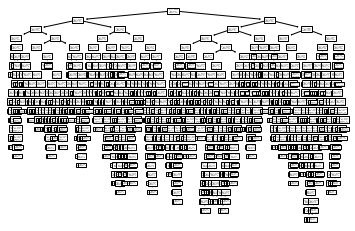

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(xtrain_dt, ytrain_dt)


tree.plot_tree(dt_clf)

[Text(0.48676474644209905, 0.9791666666666666, 'Weight <= 156.439\ngini = 0.483\nsamples = 5988\nvalue = [2448, 3540]'),
 Text(0.200150314419152, 0.9375, 'Weight <= 145.692\ngini = 0.168\nsamples = 2322\nvalue = [2107, 215]'),
 Text(0.07376898466517118, 0.8958333333333334, 'Weight <= 134.821\ngini = 0.073\nsamples = 1796\nvalue = [1728, 68]'),
 Text(0.014709667929246497, 0.8541666666666666, 'Weight <= 67.381\ngini = 0.021\nsamples = 1203\nvalue = [1190, 13]'),
 Text(0.012356121060567058, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.017063214797925937, 0.8125, 'Weight <= 122.677\ngini = 0.02\nsamples = 1202\nvalue = [1190, 12]'),
 Text(0.012356121060567058, 0.7708333333333334, 'Height <= 59.99\ngini = 0.003\nsamples = 631\nvalue = [630, 1]'),
 Text(0.010002574191887619, 0.7291666666666666, 'Height <= 59.98\ngini = 0.011\nsamples = 180\nvalue = [179, 1]'),
 Text(0.007649027323208178, 0.6875, 'gini = 0.0\nsamples = 179\nvalue = [179, 0]'),
 Text(0.012356121060567058, 0.6875

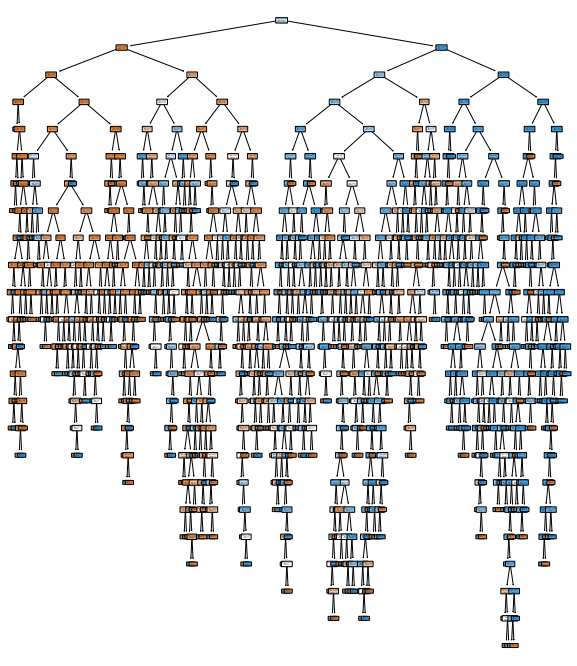

In [18]:
plt.figure(figsize=(10,12))
tree.plot_tree(dt_clf, rounded=True, filled=True,  feature_names=xtrain_dt.columns )

In [19]:
# score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve
import numpy as np

dtc_predictions = dt_clf.predict(xtest_dt)
dtc_predictions

np.array(dtc_predictions)
classification_report(ytest_dt, dtc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.87      0.85      0.86      1107\n        Male       0.89      0.91      0.90      1460\n\n    accuracy                           0.88      2567\n   macro avg       0.88      0.88      0.88      2567\nweighted avg       0.88      0.88      0.88      2567\n'

In [20]:
print(classification_report(ytest_dt, dtc_predictions))

              precision    recall  f1-score   support

      Female       0.87      0.85      0.86      1107
        Male       0.89      0.91      0.90      1460

    accuracy                           0.88      2567
   macro avg       0.88      0.88      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [21]:
confusion_matrix(ytest_dt, dtc_predictions)

array([[ 938,  169],
       [ 138, 1322]])

In [22]:
tp, fn, fp, tn = confusion_matrix(ytest_dt, dtc_predictions).reshape(-1) 

In [23]:
(tp+tn)/(tp+tn+fp+fn)

0.8804051421893261

In [24]:
accuracy_score(ytest_dt, dtc_predictions)

0.8804051421893261

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


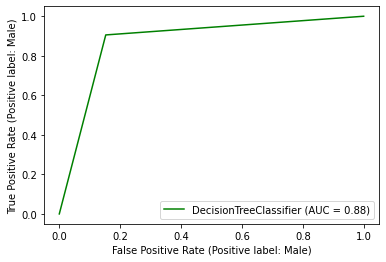

In [25]:
plot_roc_curve(dt_clf, xtest_dt, ytest_dt, color='GREEN')

# KNN Classifier, Score, Accuracy

In [26]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(xtrain_dt, ytrain_dt)
knc_predictions = kn_clf.predict(xtest_dt)
knc_predictions

array(['Male', 'Male', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [27]:
classification_report(ytest_dt, knc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.91      0.87      0.89      1107\n        Male       0.91      0.94      0.92      1460\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.90      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [28]:
print(classification_report(ytest_dt, knc_predictions))

              precision    recall  f1-score   support

      Female       0.91      0.87      0.89      1107
        Male       0.91      0.94      0.92      1460

    accuracy                           0.91      2567
   macro avg       0.91      0.90      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [29]:
confusion_matrix(ytest_dt, knc_predictions)

array([[ 965,  142],
       [  93, 1367]])

In [30]:
accuracy_score(ytest_dt, dtc_predictions)

0.8804051421893261

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


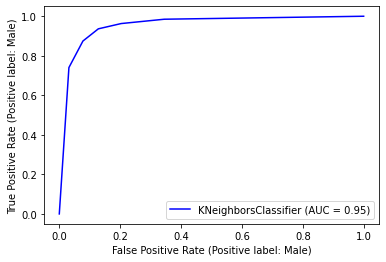

In [31]:
plot_roc_curve(kn_clf, xtest_dt, ytest_dt, color='Blue')